# About
This notebook evaluates the odd influence based on team seeds.
***
# Preface
## Imports

In [1]:
import os
os.chdir("/home/jovyan/work")

from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline

from src.transformer import HistWinLossTransformer, OddTransformer, SeedTransformer, WinLossTransformer
from src.utils import get_table

## Config

In [2]:
%matplotlib inline
sns.set()
HTML("""
<style>
.output_png{
text-align:center;
}
</style>
""")

***
# Seeds regular season
## Derive odds & seed diffs

In [3]:
# get data
df_ncaa = get_table("t_original_ncaa_tourney_compact_results")[["season", "w_team_id", "l_team_id"]]

# derive wins & losses
wltrans = WinLossTransformer(
    "w_team_id",
    "l_team_id",
)

# derive odds
otrans = OddTransformer(
    ["wins_reg_a"],
    ["losses_reg_a"],
    ["wins_reg_b"],
    ["losses_reg_b"],
    n_samples=100,
    n_experiments=100,
)

# derive seeds
strans = SeedTransformer("w_team_id", "l_team_id")

# chain transformer
ppl = Pipeline([
    ("win_loss_transformer", wltrans),
    ("odd_transfomer", otrans),
    ("seed_transformer", strans)
])

# enhance data
df_ncaa_odds_seed = ppl.fit_transform(df_ncaa)

# derive seed diff & seed diff absolute
df_ncaa_odds_seed["seed_diff"]  = df_ncaa_odds_seed["seed_rank_b"] - df_ncaa_odds_seed["seed_rank_a"]
df_ncaa_odds_seed["seed_diff_abs"] = np.abs(df_ncaa_odds_seed["seed_diff"]) 

## Plot odds by seed diff

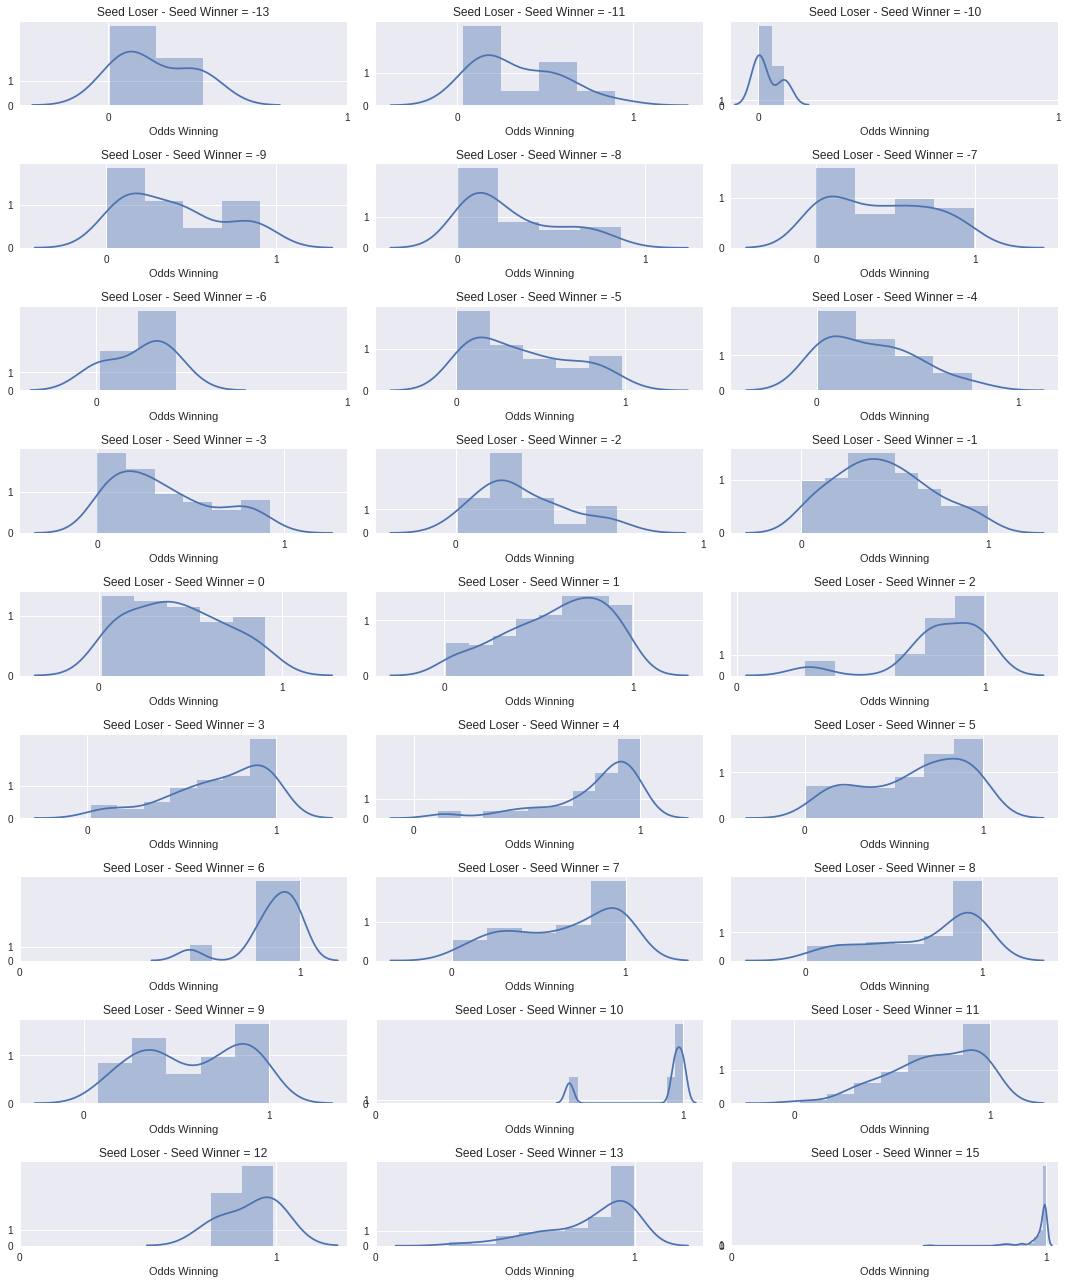

In [4]:
plt.rcParams["figure.figsize"] = (15, 18)
fig, ax = plt.subplots(9, 3)
for idx, diff in enumerate(sorted(df_ncaa_odds_seed["seed_diff"].unique())):
    plt.sca(ax.ravel()[idx])
    sns.distplot(df_ncaa_odds_seed[df_ncaa_odds_seed["seed_diff"] == diff]["odds_a"])
    plt.title("Seed Loser - Seed Winner = {}".format(diff))
    ax.ravel()[idx].set_xlabel("Odds Winning")
    ax.ravel()[idx].set_xticks([0, 1])
    ax.ravel()[idx].set_yticks([0, 1])
plt.tight_layout()
plt.savefig("./figures/06_jgoerner_odds_seeds_seed_diff_comparison.png")

## Plot odds by absolute seed diff

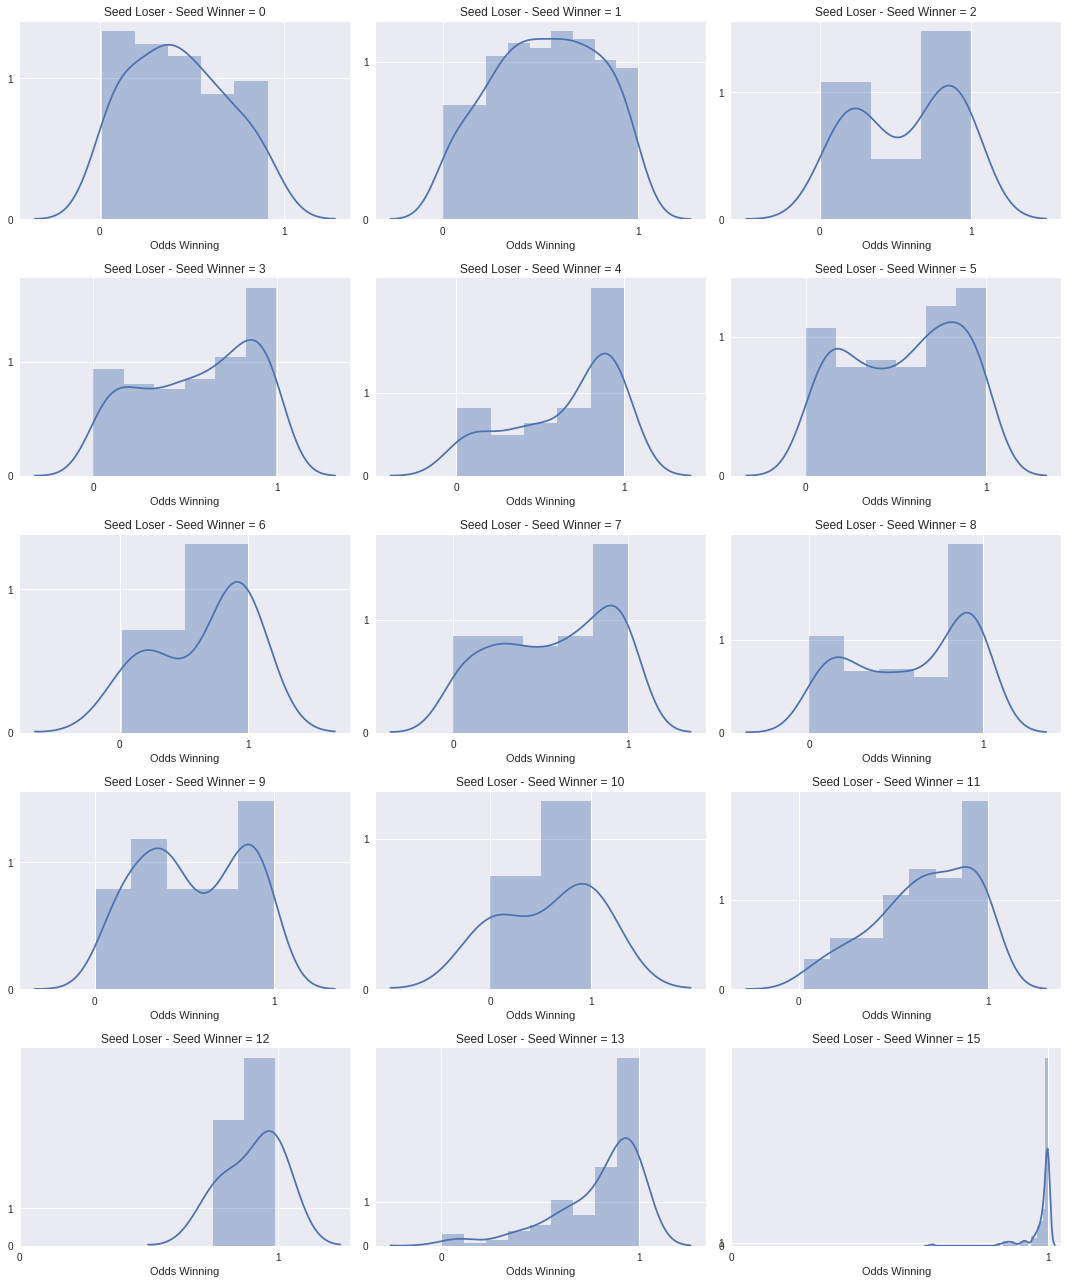

In [5]:
plt.rcParams["figure.figsize"] = (15, 18)
fig, ax = plt.subplots(5, 3)
for idx, diff in enumerate(sorted(df_ncaa_odds_seed["seed_diff_abs"].unique())):
    plt.sca(ax.ravel()[idx])
    sns.distplot(df_ncaa_odds_seed[df_ncaa_odds_seed["seed_diff_abs"] == diff]["odds_a"])
    plt.title("Seed Loser - Seed Winner = {}".format(diff))
    ax.ravel()[idx].set_xlabel("Odds Winning")
    ax.ravel()[idx].set_xticks([0, 1])
    ax.ravel()[idx].set_yticks([0, 1])
plt.tight_layout()
plt.savefig("./figures/06_jgoerner_odds_seeds_seed_diff_absolute_comparison.png")

## Odds by regional diff

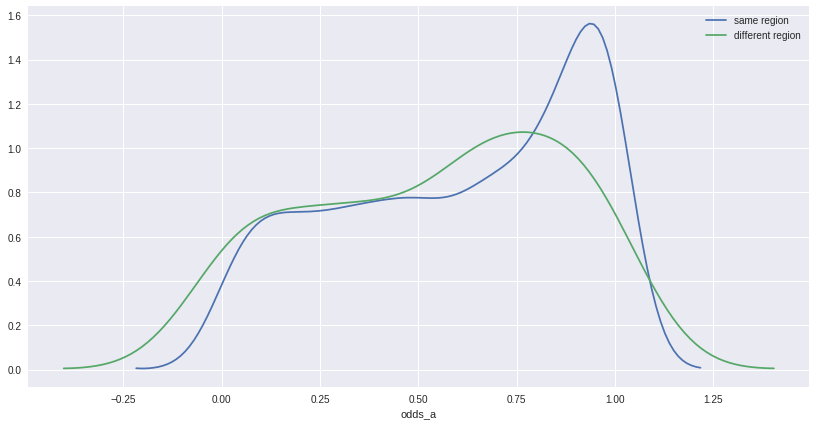

In [22]:
df_ncaa_odds_seed["seed_same_region"] = df_ncaa_odds_seed["seed_region_a"] == df_ncaa_odds_seed["seed_region_b"]

plt.rcParams["figure.figsize"] = (14, 7)
sns.distplot(
    df_ncaa_odds_seed[df_ncaa_odds_seed["seed_same_region"] == True]["odds_a"],
    label="same region",
    hist=False
)
sns.distplot(
    df_ncaa_odds_seed[df_ncaa_odds_seed["seed_same_region"] == False]["odds_a"],
    label="different region",
    hist=False
)
plt.legend(loc="best")
plt.savefig("./figures/06_jgoerner_odds_seeds_region_difference.png")

***
# Seeds historical
## Derive odds & seed diffs

In [19]:
# get data
df_ncaa = get_table("t_original_ncaa_tourney_compact_results")[["season", "w_team_id", "l_team_id"]]

# derive wins & losses
wltrans_hist = HistWinLossTransformer(
    "w_team_id",
    "l_team_id",
)

# derive odds
otrans_hist = OddTransformer(
    ["wins_hist_a"],
    ["losses_hist_a"],
    ["wins_hist_b"],
    ["losses_hist_b"],
    n_samples=100,
    n_experiments=100,
)

# derive seeds
strans = SeedTransformer("w_team_id", "l_team_id")

# chain transformer
ppl = Pipeline([
    ("win_loss_transformer", wltrans_hist),
    ("odd_transfomer", otrans_hist),
    ("seed_transformer", strans)
])

# enhance data
df_ncaa_hist_odds_seed = ppl.fit_transform(df_ncaa)

# derive seed diff & seed diff absolute
df_ncaa_hist_odds_seed["seed_diff"]  = df_ncaa_hist_odds_seed["seed_rank_b"] - df_ncaa_hist_odds_seed["seed_rank_a"]
df_ncaa_hist_odds_seed["seed_diff_abs"] = np.abs(df_ncaa_hist_odds_seed["seed_diff"]) 

## Plot odds by seed diff

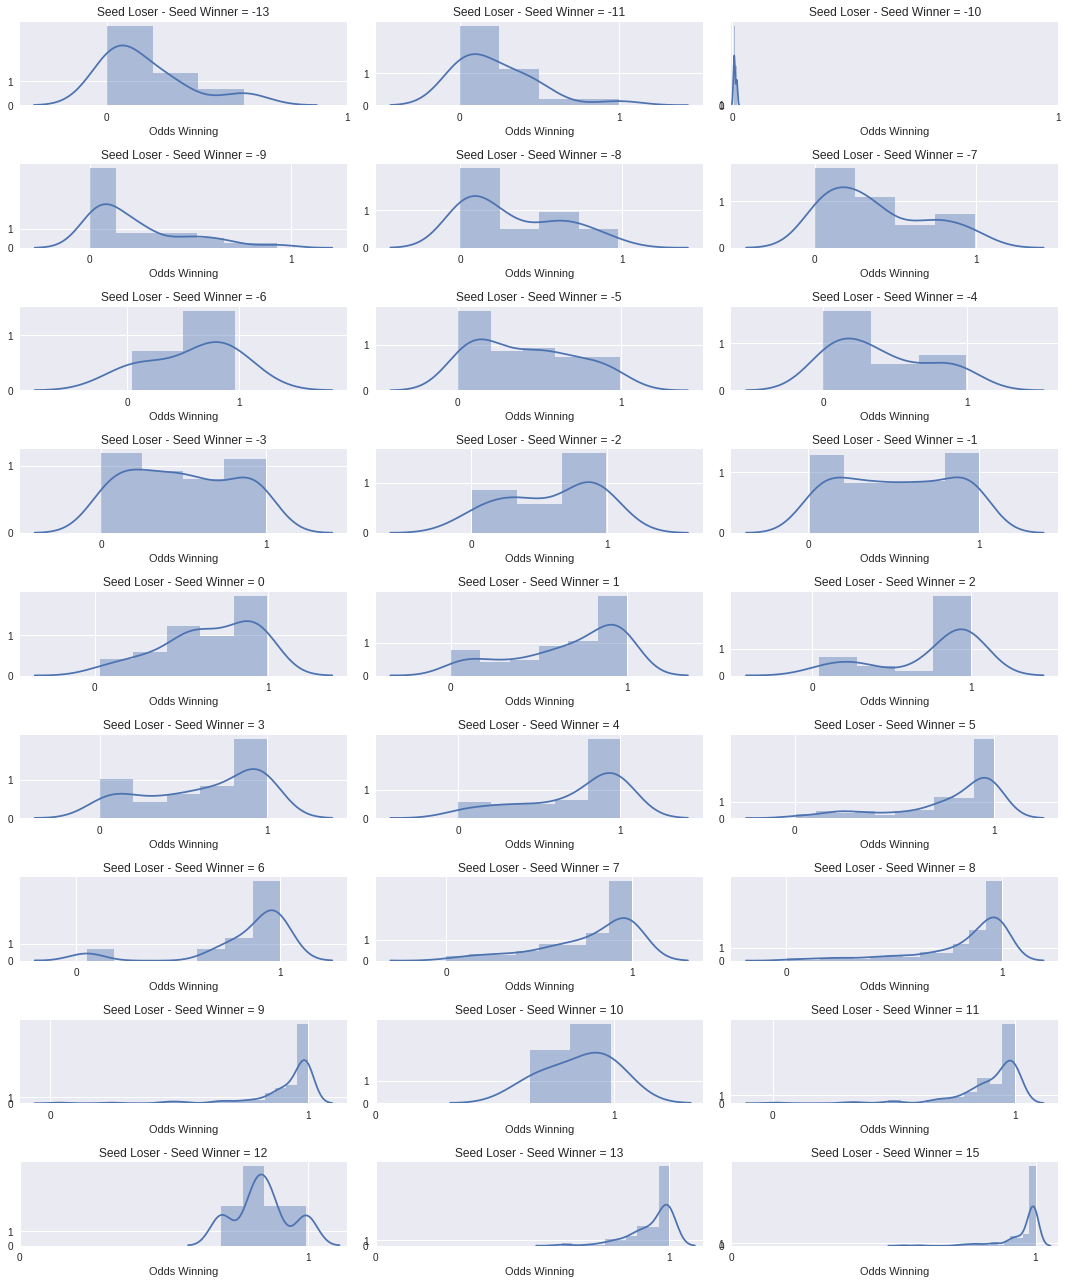

In [20]:
plt.rcParams["figure.figsize"] = (15, 18)
fig, ax = plt.subplots(9, 3)
for idx, diff in enumerate(sorted(df_ncaa_hist_odds_seed["seed_diff"].unique())):
    plt.sca(ax.ravel()[idx])
    sns.distplot(df_ncaa_hist_odds_seed[df_ncaa_hist_odds_seed["seed_diff"] == diff]["odds_a"])
    plt.title("Seed Loser - Seed Winner = {}".format(diff))
    ax.ravel()[idx].set_xlabel("Odds Winning")
    ax.ravel()[idx].set_xticks([0, 1])
    ax.ravel()[idx].set_yticks([0, 1])
plt.tight_layout()
plt.savefig("./figures/06_jgoerner_odds_seeds_hist_seed_diff_comparison.png")

## Plot odds by absolute seed diff

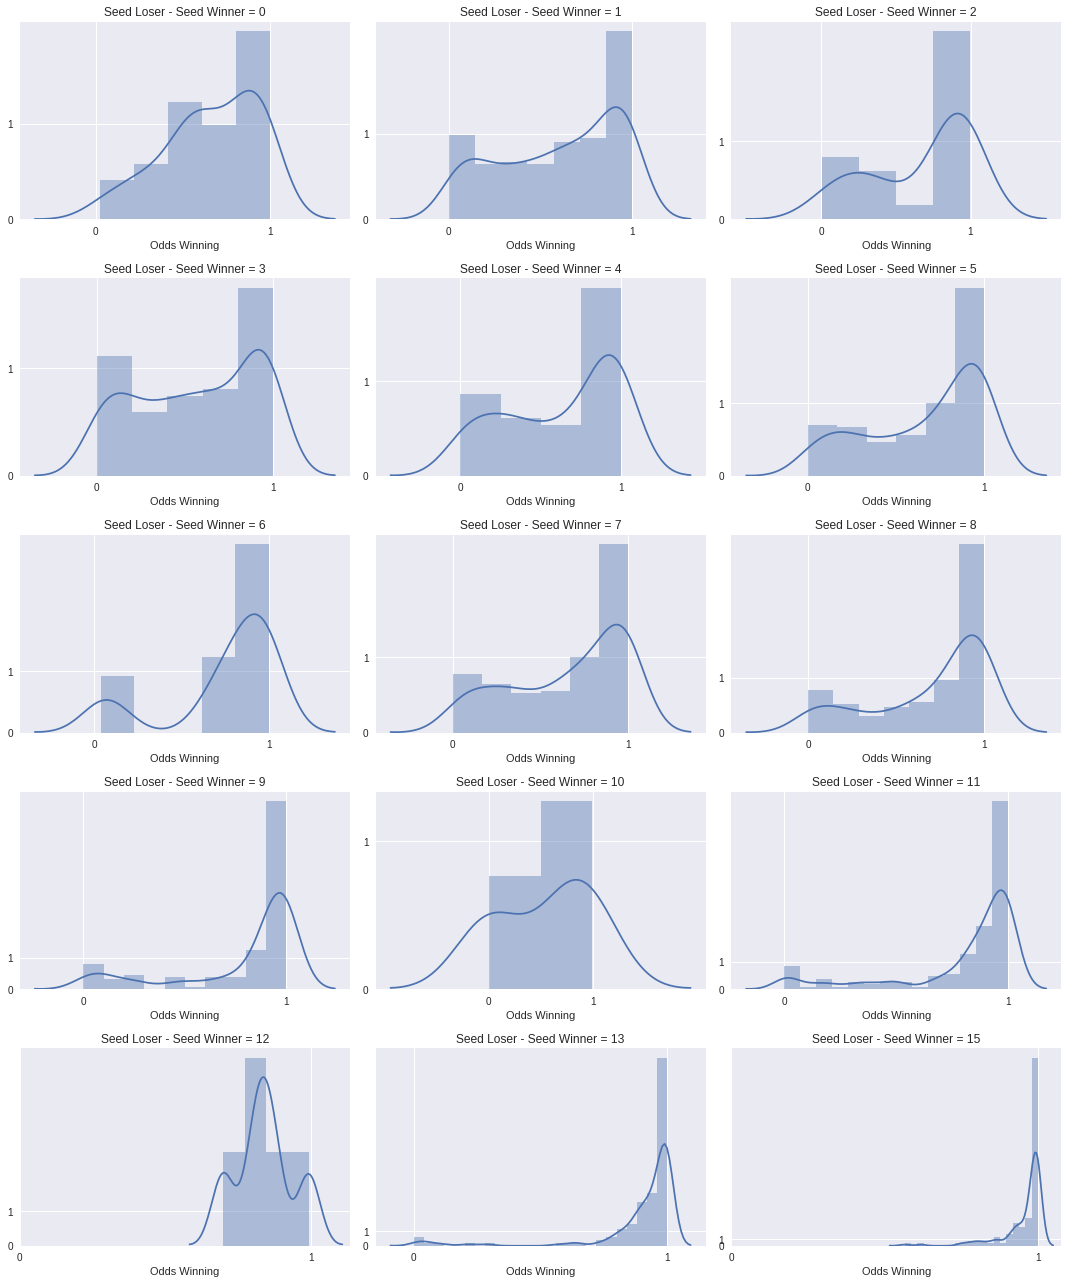

In [21]:
plt.rcParams["figure.figsize"] = (15, 18)
fig, ax = plt.subplots(5, 3)
for idx, diff in enumerate(sorted(df_ncaa_hist_odds_seed["seed_diff_abs"].unique())):
    plt.sca(ax.ravel()[idx])
    sns.distplot(df_ncaa_hist_odds_seed[df_ncaa_hist_odds_seed["seed_diff_abs"] == diff]["odds_a"])
    plt.title("Seed Loser - Seed Winner = {}".format(diff))
    ax.ravel()[idx].set_xlabel("Odds Winning")
    ax.ravel()[idx].set_xticks([0, 1])
    ax.ravel()[idx].set_yticks([0, 1])
plt.tight_layout()
plt.savefig("./figures/06_jgoerner_odds_seeds_hist_seed_diff_absolute_comparison.png")

## Odds by regional diff

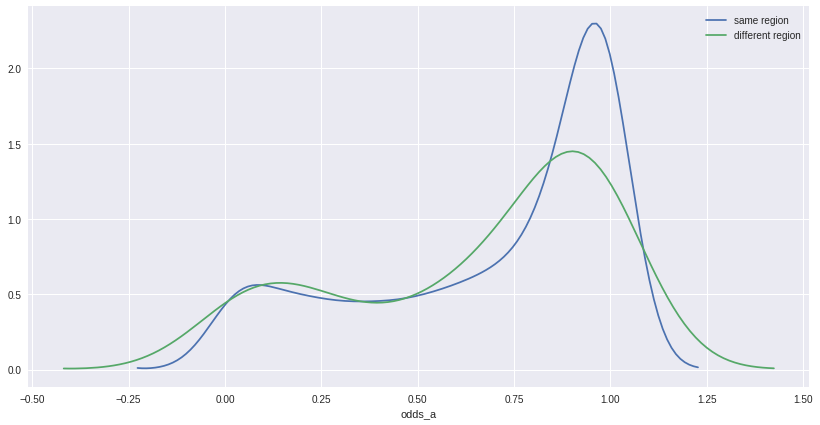

In [24]:
df_ncaa_hist_odds_seed["seed_same_region"] = df_ncaa_hist_odds_seed["seed_region_a"] == df_ncaa_hist_odds_seed["seed_region_b"]

plt.rcParams["figure.figsize"] = (14, 7)
sns.distplot(
    df_ncaa_hist_odds_seed[df_ncaa_hist_odds_seed["seed_same_region"] == True]["odds_a"],
    label="same region",
    hist=False
)
sns.distplot(
    df_ncaa_hist_odds_seed[df_ncaa_hist_odds_seed["seed_same_region"] == False]["odds_a"],
    label="different region",
    hist=False
)
plt.legend(loc="best")
plt.savefig("./figures/06_jgoerner_odds_seeds_hist_region_difference.png")